In [ ]:
# Import packages
import geopandas as gpd
import os

1. Fire perimeter data retrieval and selection


a. Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the CRS of the data and whether this is projected or geographic.



In [ ]:
# Import data
fp = os.path.join("data", "California_Fire_Perimeters_4280901625349411772.geojson")
cal_fire = gpd.read_file(fp)

Plot to visualize data

<Axes: >

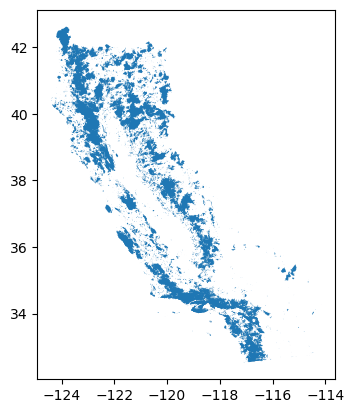

In [ ]:
# Visualize data
cal_fire.plot()

Check CRS data of gdf

In [ ]:
# Check CRS of data
cal_fire.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Check head of data frame

In [ ]:
# View first five rows of df
cal_fire.head()

,objectid,year,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_name,irwinid,fire_num,complex_id,decades,geometry
0,1,2023,CA,CDF,SKU,WHITWORTH,00004808,"Sat, 17 Jun 2023 00:00:00 GMT","Sat, 17 Jun 2023 00:00:00 GMT",5.0,1.0,1.0,5.729125,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020.0,"POLYGON ((-122.91148 41.53201, -122.91150 41.5..."
1,2,2023,CA,LRA,BTU,KAISER,00010225,"Fri, 02 Jun 2023 00:00:00 GMT","Fri, 02 Jun 2023 00:00:00 GMT",5.0,1.0,1.0,13.602380,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020.0,"POLYGON ((-121.96182 39.82970, -121.96181 39.8..."
2,3,2023,CA,CDF,AEU,JACKSON,00017640,"Sat, 01 Jul 2023 00:00:00 GMT","Sun, 02 Jul 2023 00:00:00 GMT",2.0,1.0,1.0,27.814460,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020.0,"POLYGON ((-120.90644 38.29537, -120.90397 38.2..."
3,4,2023,CA,CDF,AEU,CARBON,00018821,"Tue, 11 Jul 2023 00:00:00 GMT","Tue, 11 Jul 2023 00:00:00 GMT",9.0,1.0,1.0,58.760230,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},None,None,2020.0,"POLYGON ((-120.98579 38.44344, -120.98488 38.4..."
4,5,2023,CA,CDF,AEU,LIBERTY,00018876,"Tue, 11 Jul 2023 00:00:00 GMT","Wed, 12 Jul 2023 00:00:00 GMT",14.0,1.0,1.0,70.979000,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},None,None,2020.0,"POLYGON ((-120.98886 38.25035, -120.98895 38.2..."


Check dtypes

In [95]:
# Check dtypes of df
cal_fire.dtypes

OBJECTID           int64
YEAR_            float64
STATE             object
AGENCY            object
UNIT_ID           object
FIRE_NAME         object
INC_NUM           object
ALARM_DATE        object
CONT_DATE         object
CAUSE            float64
C_METHOD         float64
OBJECTIVE        float64
GIS_ACRES        float64
COMMENTS          object
COMPLEX_NAME      object
IRWINID           object
FIRE_NUM          object
COMPLEX_ID        object
DECADES          float64
geometry        geometry
dtype: object

### Data Summary

From the CRS data we can see that this data is geographic and 2D. It contains open-access data about fire perimeters in California and contains dates, locations, names, causes, and other relvant data to the fires. 

b. From your fire perimeter data, select the Thomas Fire boundary. The fire occurred in 2017.

In [ ]:
# Clean column names
cal_fire = cal_fire.rename(columns={"YEAR_": "YEAR"})
cal_fire.columns = cal_fire.columns.str.lower()

# Drop data with no years
cal_fire = cal_fire.dropna(subset=['year'])

# Turn year column dataype to int
cal_fire["year"] = cal_fire["year"].astype(int)

In [ ]:
# Preview cleaned df
cal_fire.head()

,objectid,year,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_name,irwinid,fire_num,complex_id,decades,geometry
0,1,2023,CA,CDF,SKU,WHITWORTH,00004808,"Sat, 17 Jun 2023 00:00:00 GMT","Sat, 17 Jun 2023 00:00:00 GMT",5.0,1.0,1.0,5.729125,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020.0,"POLYGON ((-122.91148 41.53201, -122.91150 41.5..."
1,2,2023,CA,LRA,BTU,KAISER,00010225,"Fri, 02 Jun 2023 00:00:00 GMT","Fri, 02 Jun 2023 00:00:00 GMT",5.0,1.0,1.0,13.602380,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020.0,"POLYGON ((-121.96182 39.82970, -121.96181 39.8..."
2,3,2023,CA,CDF,AEU,JACKSON,00017640,"Sat, 01 Jul 2023 00:00:00 GMT","Sun, 02 Jul 2023 00:00:00 GMT",2.0,1.0,1.0,27.814460,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020.0,"POLYGON ((-120.90644 38.29537, -120.90397 38.2..."
3,4,2023,CA,CDF,AEU,CARBON,00018821,"Tue, 11 Jul 2023 00:00:00 GMT","Tue, 11 Jul 2023 00:00:00 GMT",9.0,1.0,1.0,58.760230,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},None,None,2020.0,"POLYGON ((-120.98579 38.44344, -120.98488 38.4..."
4,5,2023,CA,CDF,AEU,LIBERTY,00018876,"Tue, 11 Jul 2023 00:00:00 GMT","Wed, 12 Jul 2023 00:00:00 GMT",14.0,1.0,1.0,70.979000,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},None,None,2020.0,"POLYGON ((-120.98886 38.25035, -120.98895 38.2..."


In [ ]:
# Create conditinals to select for thomas fire
is_thomas = cal_fire["fire_name"] == "THOMAS"
is_2017 = cal_fire["year"] == 2017

# Select for Thomas Fire
thomas_2017 = cal_fire[is_thomas & is_2017]
thomas_2017.head()

,objectid,year,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_name,irwinid,fire_num,complex_id,decades,geometry
2654,2655,2017,CA,USF,VNC,THOMAS,00003583,"Mon, 04 Dec 2017 00:00:00 GMT","Fri, 12 Jan 2018 00:00:00 GMT",9.0,7.0,1.0,281790.9,CONT_DATE based on Inciweb,None,,None,None,2010.0,"MULTIPOLYGON (((-119.62046 34.44382, -119.6209..."


<Axes: >

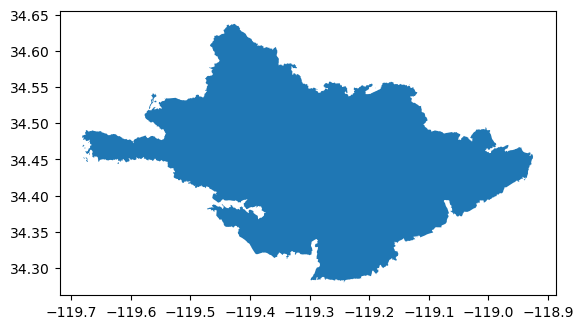

In [ ]:
# Visualize Thomas Fire boundary
thomas_2017.plot()

c. Save only the 2017 Thomas Fire boundary as a geospatial file in the format of your choosing. The file should go into the data/ directory in your repository.

In [ ]:
# Save Thomas Fire df as GeoJSON
thomas_2017.to_file("data/thomas_2017.geojson", driver="GeoJSON")



d. In a markdown cell, briefly explain your reasoning for selecting that specific file format.



I chose the GeoJSON due to its readabiilty and ease of import compared to a .shp file. A .shp file tends to have a directly of files that it is reliant on vs a GeoJSON is self contained.